In [434]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [435]:
model = tf.global_variables_initializer()


data = pd.read_csv('cars.csv',
                  thousands=',',
                  names=['name','year','fuel','km','price'],
                  encoding='euc-kr')
data.head()


,name,year,fuel,km,price
0,BMW 120d 쿠페,19/09,디젤,170000,6000000
1,BMW 1M 쿠페,19/12,가솔린,60000,37500000
2,BMW 1M 쿠페,19/11,가솔린,50000,42000000
3,BMW 1M 쿠페,19/12,가솔린,60000,43500000
4,BMW 218d 액티브 투어러 조이,18/03,디젤,4000,20500000


In [436]:

carname = input("판매할 차량을 입력하시오 : ").split(' ')
cars = []
z_data = []
for car in data.values :
    if all(x in car[0].lower() for x in carname):
        print(car[0].lower())
        z_data.append(car[0].lower())
        cars.append([car[3],car[4]])
    
    
print(cars)


판매할 차량을 입력하시오 : 마세라티
마세라티 4200gt 스파이더
마세라티 그란카브리오 4.7 mc
마세라티 그란카브리오 4.7 스포츠
마세라티 그란카브리오 4.7 스포츠
마세라티 그란투리스모 4.2 v8
마세라티 그란투리스모 4.7 mc
마세라티 그란투리스모 4.7 mc 
마세라티 그란투리스모 s 4.7 v8 mc 시프트
마세라티 그란투리스모 s 4.7 v8 오토매틱
마세라티 그란투리스모 s 4.7 v8 오토매틱
마세라티 그란투리스모 스포츠 4.7 
마세라티 그란투리스모 스포츠 4.7 mc 시프트
마세라티 그란투리스모 스포츠 4.7 mc 오토
마세라티 그란투리스모 스포츠 4.7 mc 오토
마세라티 기블리 3.0 v6
마세라티 기블리 3.0 v6
마세라티 기블리 3.0 v6
마세라티 기블리 3.0 v6 s q4
마세라티 기블리 3.0 v6 s q4
마세라티 기블리 3.0 v6 s q4 그란스포츠
마세라티 기블리 3.0 v6 s q4 네리시모 에디션
마세라티 기블리 3.0 v6 그란루쏘
마세라티 기블리 3.0 v6 그란루쏘
마세라티 기블리 3.0 v6 그란루쏘
마세라티 기블리 3.0 v6 그란루쏘
마세라티 기블리 3.0 디젤
마세라티 기블리 3.0 디젤
마세라티 기블리 3.0 디젤
마세라티 기블리 3.0 디젤 그란스포츠
마세라티 기블리 3.0 디젤 스포츠
마세라티 기블리 3.0 디젤 스포츠
마세라티 르반떼 3.0 s 럭셔리
마세라티 르반떼 3.0 그란스포츠
마세라티 르반떼 3.0 그란스포츠
마세라티 르반떼 3.0 그란스포츠
마세라티 르반떼 3.0 그란스포츠
마세라티 르반떼 3.0 그란스포츠
마세라티 르반떼 3.0 그란스포츠
마세라티 르반떼 3.0 디젤
마세라티 르반떼 3.0 디젤 그란루쏘
마세라티 르반떼 3.0 디젤 그란루쏘
마세라티 르반떼 3.0 디젤 그란스포츠
마세라티 르반떼 3.0 디젤 그란스포츠
마세라티 르반떼 3.0 디젤 스포츠
마세라티 르반떼 3.0 프리미엄
마세라티 르반떼 3.0 프리미엄
마세라티 콰트로포르테 3.0 s q4
마세라티 콰트로포르테 

In [437]:
xy = np.array(cars,dtype=np.int32)

In [448]:
x_data=xy[:,[0]]
y_data = xy[:,[1]]

print(x_data)

[[ 30000]
 [  8000]
 [ 30000]
 [  5000]
 [ 60000]
 [  1000]
 [ 10000]
 [ 40000]
 [ 20000]
 [ 50000]
 [  2000]
 [ 70000]
 [ 10000]
 [ 80000]
 [120000]
 [ 10000]
 [  8000]
 [ 80000]
 [ 30000]
 [ 10000]
 [ 10000]
 [ 30000]
 [ 50000]
 [ 10000]
 [  2000]
 [ 80000]
 [ 30000]
 [ 20000]
 [  5000]
 [ 70000]
 [ 60000]
 [ 20000]
 [ 30000]
 [ 10000]
 [ 10000]
 [ 10000]
 [ 10000]
 [  2000]
 [ 40000]
 [ 10000]
 [ 10000]
 [ 20000]
 [ 10000]
 [ 50000]
 [ 20000]
 [ 10000]
 [  9000]
 [ 50000]
 [  3000]
 [ 10000]
 [ 70000]
 [ 30000]
 [ 70000]
 [ 40000]
 [ 20000]
 [  2000]
 [ 10000]
 [ 30000]
 [ 30000]
 [ 70000]
 [ 80000]
 [ 40000]
 [ 30000]
 [ 30000]]


In [449]:


model =  LinearRegression()

In [450]:
model.fit(x_data,y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [451]:
model.score(x_data,y_data)




0.3756597311996652

In [453]:
k = float(input("키로수를 입력하세요: "))
pri = int(model.predict([[k]]))
print(pri)
x=[]
aa = []
for i in range(20):
    x.append(int(k+500*i))
    aa.append([int(model.predict([[k+500*i]]))])


키로수를 입력하세요: 8000
100781361


model.coef

In [454]:
model.coef_

array([[-708.66227354]])

In [455]:
model.intercept_

array([1.06450659e+08])

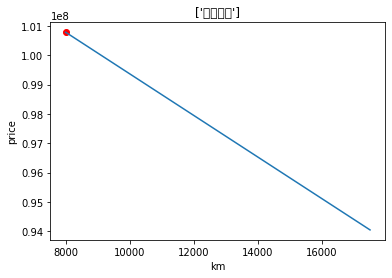

In [458]:
plt.title(carname)
plt.plot(k,pri,"ro")
plt.plot(x,aa)
plt.xlabel('km')
plt.ylabel('price')

plt.show()